In [6]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
# Set the data directory
data_dir = './newdata/myflowers_dataset'

# Get the class names from the folder names
class_names = sorted(os.listdir(data_dir))

# Create an image data generator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Zoom in and out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in new pixels with the nearest value
)

# Load all images and their labels
all_images = []
all_labels = []
for class_idx, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    for img_path in os.listdir(class_path):
        img_path = os.path.join(class_path, img_path)
        img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        img_array = keras.preprocessing.image.img_to_array(img)
        all_images.append(img_array)
        all_labels.append(class_idx)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.1, random_state=42)

In [26]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
# Train the model
epochs = 20
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=50),
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.1039 - loss: 3.3631 - val_accuracy: 0.3279 - val_loss: 154.1713
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.3291 - loss: 1.9304 - val_accuracy: 0.4536 - val_loss: 172.2471
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4499 - loss: 1.5598 - val_accuracy: 0.4863 - val_loss: 201.1539
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5579 - loss: 1.2603 - val_accuracy: 0.4536 - val_loss: 325.9394


In [12]:
# Save the model to an H5 file
model.save('flower_classifier1.h5')

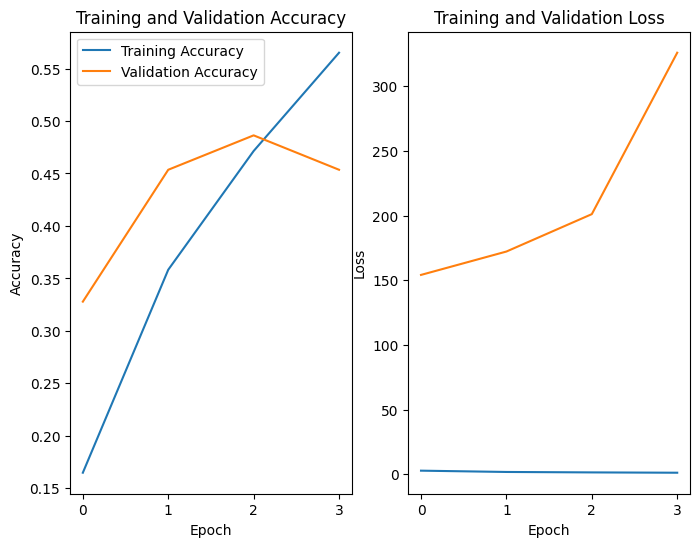

In [28]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [44]:
# Set the data directory
path = "./newdata/myflowers_dataset"

# Set the image size, batch size, channels, and epochs
Image_size = 224  # Set the image size to 224x224 for MobileNet V2
Batch_size = 64
Channels = 3
EPOCHS = 20
train_size = 0.85

Found 1826 files belonging to 20 classes.
Using 1553 files for training.
Found 1826 files belonging to 20 classes.
Using 273 files for validation.
Class Names: ['balloon flower', 'black-eyed susan', 'foxglove', 'frangipani', 'jasmine', 'lotus lotus', 'orange hibiscus', 'orange marigold', 'oxeye daisy', 'pink hibiscus', 'pink rose', 'red hibiscus', 'redRose', 'stemless gentian', 'sunflower', 'thorn apple', 'water lily', 'yellow hibiscus', 'yellow marigold', 'yellow rose']
Number of Classes: 20


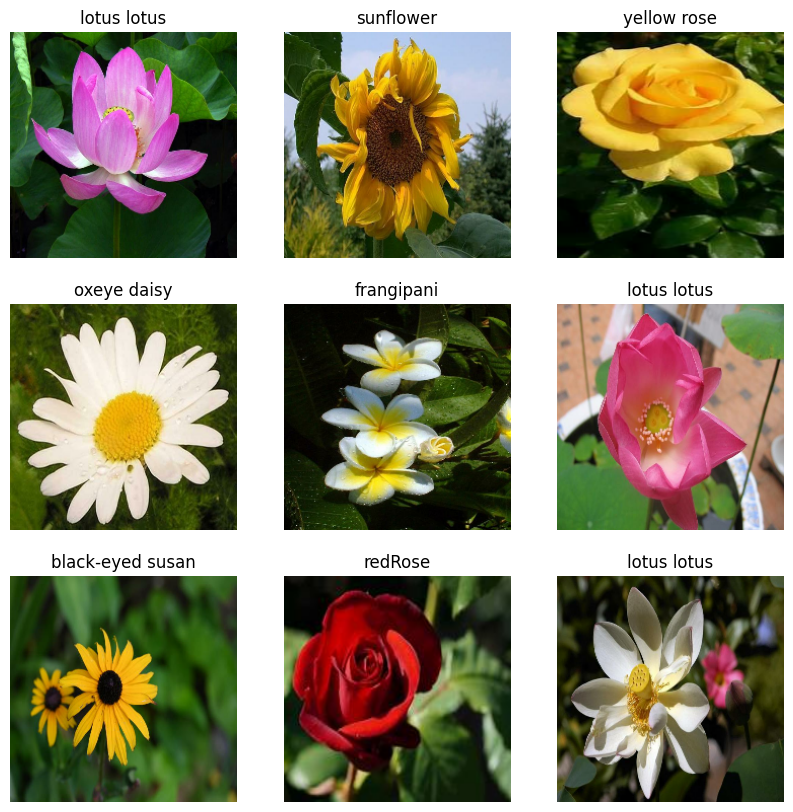

In [46]:
# Define your data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],  # Add brightness augmentation
    channel_shift_range=20,  # Add channel shift augmentation
    preprocessing_function=None  # Add preprocessing function
)

# Training dataset with data augmentation
train_dataset_augmented = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    shuffle=True,
    validation_split=0.15,
    subset="training",
    seed=123,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size,
)

# Validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    shuffle=True,
    validation_split=0.15,
    subset="validation",
    seed=123,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size,
)

# Cache, shuffle, and prefetch the datasets
train_ds = train_dataset_augmented.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Get the class names and the number of classes
class_names = train_dataset_augmented.class_names
print("Class Names:", class_names)
n_classes = len(class_names)
print("Number of Classes:", n_classes)

# Convert the dataset into an iterator
train_dataset_iterator = iter(train_dataset_augmented)

# Get a batch of images and labels
images, labels = next(train_dataset_iterator)

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i in range(min(9, images.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")
plt.show()

In [47]:
from tensorflow.keras.applications import MobileNet
# Load the pre-trained MobileNet model without the classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(Image_size, Image_size, Channels))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation='relu')(x)
predictions = keras.layers.Dense(n_classes, activation='softmax')(x)

# Construct the final model
model = keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/20


25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.1657 - loss: 2.8996 - val_accuracy: 0.4212 - val_loss: 1.9912
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5273 - loss: 1.7225 - val_accuracy: 0.6007 - val_loss: 1.4896
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6411 - loss: 1.2285 - val_accuracy: 0.5971 - val_loss: 1.2942
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7227 - loss: 0.9630 - val_accuracy: 0.6593 - val_loss: 1.1763
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7932 - loss: 0.7433 - val_accuracy: 0.6813 - val_loss: 1.1029
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8404 - loss: 0.6454 - val_accuracy: 0.6703 - val_loss: 1.0856
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 974ms/step - accuracy: 0.8525 - loss: 0.5966 - val_accuracy: 0.6996 - val_loss: 0.9432
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 971ms/step - accuracy: 0.8708 - loss: 0.4727 - val_accuracy: 0.6850 - val_loss: 0.99

In [49]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 390ms/step - accuracy: 0.8812 - loss: 0.4977
Test loss: 0.4426
Test accuracy: 0.8852


In [50]:
# Save the model to an H5 file
model.save('flower_classifier_transfer_learning.h5')

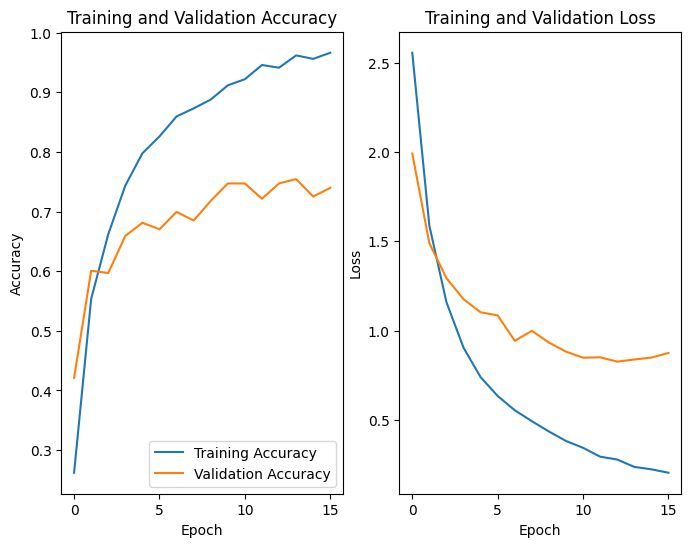

: 

In [51]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [21]:
# Create your model
model = Sequential()
model.add(Resizing(Image_size, Image_size))
model.add(Rescaling(1.0 / Image_size))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(Image_size, Image_size, Channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [22]:
# Compile the model
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.1474 - loss: 2.7435 - val_accuracy: 0.4469 - val_loss: 1.7691
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4299 - loss: 1.6762 - val_accuracy: 0.6264 - val_loss: 1.1668
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6113 - loss: 1.1104 - val_accuracy: 0.6447 - val_loss: 1.0992
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7203 - loss: 0.8051 - val_accuracy: 0.7509 - val_loss: 0.8320
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8037 - loss: 0.5686 - val_accuracy: 0.6630 - val_loss: 1.0301
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8443 - loss: 0.4522 - val_accuracy: 0.7253 - val_loss: 0.8629
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8916 - loss: 0.3088 - val_accuracy: 0.7509 - val_loss: 0.9581


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

In [ ]:
# Save the model to an H5 file
model.save('flower_classifier.h5')

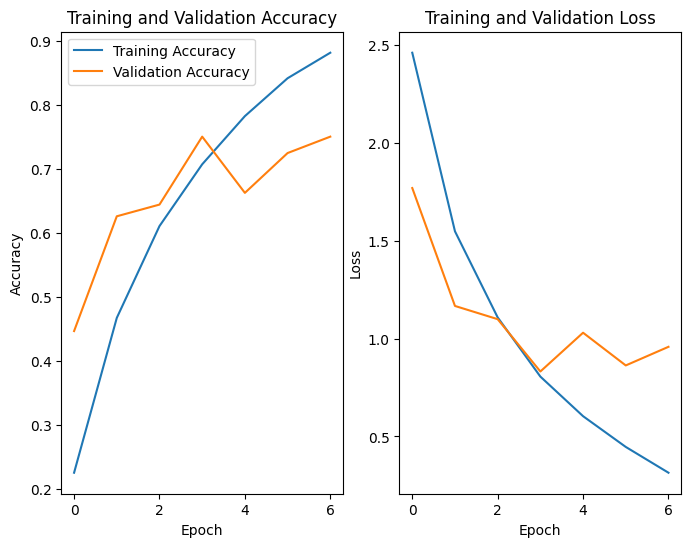

In [25]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()